# 1

In [35]:
from sys import platform
import glob
import matplotlib.pyplot as plt
from random import shuffle, seed
from os.path import abspath
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [19]:
def check_if_cat_windows(file_path):
    if (file_path.split("/")[-1][6:].split(".")[0] == 'cat'): 
        return 0 
    else: 
        return 1

def check_if_cat_mac(file_path):
    if (file_path.split("/")[-1].split(".")[0] == 'cat'): 
        return 0 
    else: 
        return 1

def shuffle_list(list_x:list):
    shuffle(list_x)
    return list_x

In [20]:
seed(418)
current_directory = abspath("")

if platform == "darwin":
    train_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_mac(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/train/*.jpg"
        )
    ])

    val_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_mac(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/val/*.jpg"
        )
    ])

    test_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_mac(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/test/*.jpg"
        )
    ])

if platform == "win32":
    train_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_windows(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/train/*.jpg"
        )
    ])

    val_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_windows(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/val/*.jpg"
        )
    ])

    test_images = shuffle_list([
        (plt.imread(file_path), check_if_cat_windows(file_path))
        for file_path in glob.glob(
            f"{current_directory}/experiment_small_dataset/test/*.jpg"
        )
    ])

## a)

In [21]:
train_images[1][0].shape[:2]

(500, 374)

In [37]:
def get_image_size(image_list:list):
    return [image[0].shape[:2] for image  in image_list]

image_sizes = pd.DataFrame(get_image_size(train_images) + get_image_size(val_images) + get_image_size(test_images), columns=['height', 'width'])

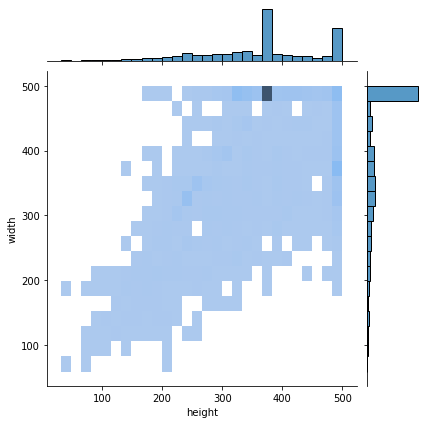

In [56]:
sns.jointplot(data=image_sizes,x='height', y='width', kind='hist');

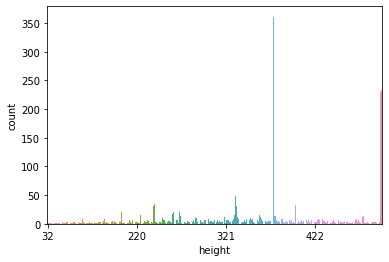

In [53]:
ax = sns.countplot(data=image_sizes, x='height');
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

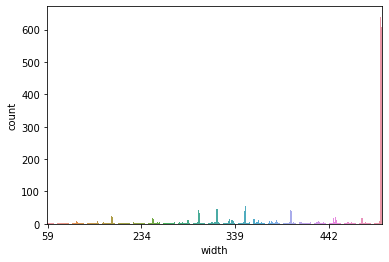

In [55]:
ax = sns.countplot(data=image_sizes, x='width');
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

## b)